#Thinkful Data Science

## Unit Two: Analyzing Data
##Lesson Three: Linear Regression and Correlation

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Import data
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

###Clean FICO data

In [56]:
# FICO DATA
print(loansData['FICO.Range'][0:5])

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
Name: FICO.Range, dtype: object


In [57]:
# Split into numbers - will return in form [###, ###]
cleanFICORange = loansData['FICO.Range'].map(lambda x: x.split('-'))

In [58]:
print(cleanFICORange[0:5])

81174    [735, 739]
99592    [715, 719]
80059    [690, 694]
15825    [695, 699]
33182    [695, 699]
Name: FICO.Range, dtype: object


In [59]:
# We have a string inside a list. Need to convert each string to integer
# To do this, we use a list comprehension
# We could either choose the first element, last element, or an average value
# The "[0]" at the end makes it so that we only choose the first element
cleanFICOScore = cleanFICORange.map(lambda x: [int(n) for n in x][0])

In [60]:
print((cleanFICORange.head(5)))

81174    [735, 739]
99592    [715, 719]
80059    [690, 694]
15825    [695, 699]
33182    [695, 699]
Name: FICO.Range, dtype: object


In [61]:
# According to Thinkful, to understand better, check out: http://carlgroner.me/Python/2011/11/09/An-Introduction-to-List-Comprehensions-in-Python.html

# Assign cleaned score to new column called "FICO.Score"
loansData['FICO.Score'] = cleanFICOScore

In [62]:
loansData['FICO.Score'].head(5)

81174    735
99592    715
80059    690
15825    695
33182    695
Name: FICO.Score, dtype: int64

###Plot FICO Data

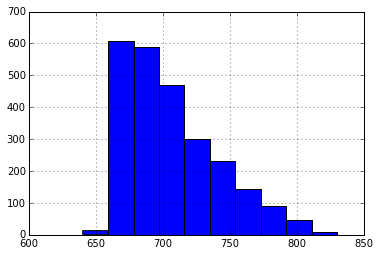

In [63]:
# Histogram
plt.figure()
p = loansData['FICO.Score'].hist()
plt.savefig('FicoScore_hist.png')

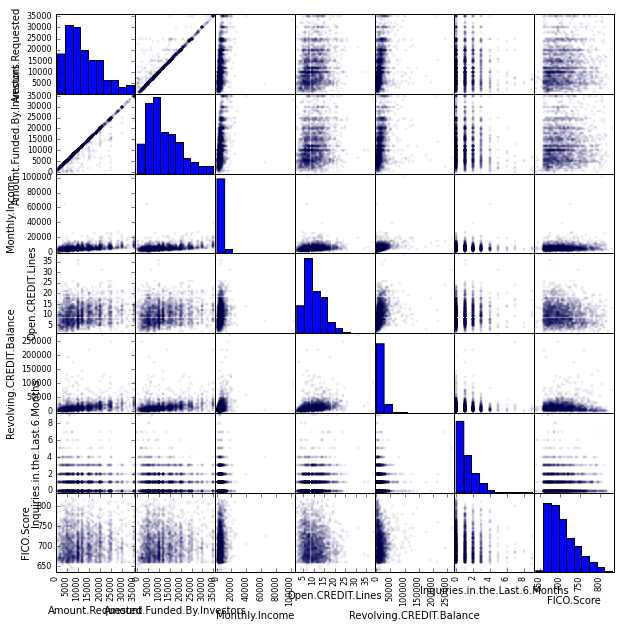

In [64]:
# Scatterplot matrix
plt.close()
a = pd.scatter_matrix(loansData, alpha=0.05, figsize=(10,10), diagonal='hist')
plt.savefig('FicoScore_ScatterMatrix.png')

###Clean Interest Rate Data

In [65]:
print(loansData['Interest.Rate'].head(5))

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
Name: Interest.Rate, dtype: object


In [66]:
# CLEAN INTEREST RATE DATA
clean_ir = loansData["Interest.Rate"].map(lambda x: round(float(x.rstrip("%"))/100, 4))
loansData["Interest.Rate"] = clean_ir

In [67]:
print(loansData['Interest.Rate'].head(5))

81174    0.0890
99592    0.1212
80059    0.2198
15825    0.0999
33182    0.1171
Name: Interest.Rate, dtype: float64


###Clean Loan Length Data

In [68]:
print(loansData['Loan.Length'].head(5))

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
Name: Loan.Length, dtype: object


In [69]:
# CLEAN LOAN LENGTH DATA
clean_loanLength = loansData["Loan.Length"].map(lambda x: float(x.rstrip("months")))
loansData["Loan.Length"] = clean_loanLength

In [70]:
print(loansData['Loan.Length'].head(5))

81174    36
99592    36
80059    60
15825    36
33182    36
Name: Loan.Length, dtype: float64


###Linear Regression!!!

In [72]:
# Linear regression model: 
# InterestRate = b + a1(FICOScore) + a2(LoanAmount)

intrate = loansData['Interest.Rate']
loanamt = loansData['Amount.Requested']
fico = loansData['FICO.Score']

# Create y and x variables
# The dependent variable
y = np.matrix(intrate).transpose()
# The independent variables shaped as columns
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()
# put the two columns together to create an input matrix 
x = np.column_stack([x1,x2])

# Create linear model
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

###Results Summary

In [73]:
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2388.
Date:                Wed, 12 Aug 2015   Prob (F-statistic):               0.00
Time:                        20:10:41   Log-Likelihood:                 5727.6
No. Observations:                2500   AIC:                        -1.145e+04
Df Residuals:                    2497   BIC:                        -1.143e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7288      0.010     73.734      0.000         0.709     0.748
x1            -0.0009    1.4e-05    -63.022      0.000        -0.001    -0.001
x2          2.107e-06    6.3e-08     33.443      0.000      1.98e-06  2.23e-06
==============================================================================
Omnibus:                       69.496   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.811
Skew:                           0.379   Prob(JB):                     1.27e-17
Kurtosis:                       3.414   Cond. No.                     2.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""